# Decision-making maps addressed in the verification of the error setting
This file deals with the following decision-making maps.
* Q-Q plot
* Shapiro-Wilk normality test
* Residual plot

In [26]:
import sys
import pandas as pd
import statsmodels.formula.api as smf
import itertools

In [10]:
%matplotlib inline

# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats

# Load data
# Put real_estate.csv in the same folder as this file
df = pd.read_csv('real_estate_oe.csv')
display(df)

,area,age,walking,structure,sunlight,price
0,85,31,6,RC,Bad,13.4
1,130,22,19,RC,Good,28.2
2,85,6,4,W,Bad,29.1
3,80,9,10,W,Good,27.2
4,90,22,9,RC,Good,26.1
...,...,...,...,...,...,...
294,50,18,7,W,Good,5.0
295,85,20,12,RC,Good,29.2
296,85,11,8,RC,Bad,28.0
297,100,29,9,RC,Good,25.1


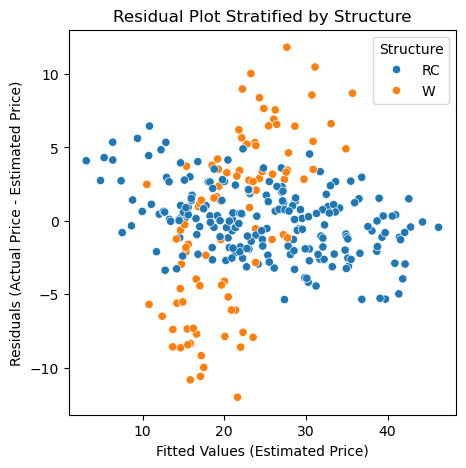

In [22]:
model = 'price ~ area + age + walking + structure + sunlight'
results = smf.ols(model, df).fit()

plt.figure(figsize=(5, 5))
sns.scatterplot(x=results.fittedvalues, y=df['price'] - results.fittedvalues, hue=df['structure'])
plt.title("Residual Plot Stratified by Structure")
plt.xlabel("Fitted Values (Estimated Price)")
plt.ylabel("Residuals (Actual Price - Estimated Price)")
plt.legend(title='Structure')
plt.show()


In [16]:
# Estimate regression equation
# Specify regression equation in the model.
# Example: In the case of regression equation including area and age  model = 'price ~ area + age' 
model = 'price ~ area + age + walking + structure + sunlight + age * structure'
results = smf.ols(model, df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1063.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          4.21e-195
Time:                        19:03:00   Log-Likelihood:                -627.25
No. Observations:                 299   AIC:                             1269.
Df Residuals:                     292   BIC:                             1294.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             31.4285      0.697     45.121      0.000      30.058      32.799
structure[T.W]         0.8078      0.567      1.425      0.155      -0.307       1.923
sunlight[T.Good]       7.3514      0.235     31.235      0.000       6.888       7.815
area                   0.1188      0.006     18.338      0.000       0.106       0.132
age                   -0.7177      0.014    -52.572      0.000      -0.745      -0.691
age:structure[T.W]    -1.2787      0.046    -27.900      0.000      -1.369      -1.189
walking               -0.6252      0.026    -24.017      0.000      -0.676      -0.574
==============================================================================
Omnibus:                        1.653   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.540
Skew:                          -0.073   Prob(JB):                        0.463
Kurtosis:                       2.680   Cond. No.                         605.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Q-Q plot

In [17]:
# Q-Q plot
stats.probplot(df['price']-results.fittedvalues, dist='norm', plot=plt)


((array([-2.83163513, -2.53513316, -2.36724083, -2.24759425, -2.1534557 ,
         -2.07524656, -2.00798865, -1.94874985, -1.89565172, -1.84741566,
         -1.80313046, -1.76212289, -1.72388091, -1.68800561, -1.65417993,
         -1.62214751, -1.59169801, -1.56265662, -1.53487641, -1.50823263,
         -1.48261848, -1.4579417 , -1.4341221 , -1.41108949, -1.38878205,
         -1.36714505, -1.34612982, -1.32569284, -1.30579504, -1.28640121,
         -1.26747952, -1.24900105, -1.23093949, -1.21327079, -1.19597295,
         -1.17902575, -1.16241058, -1.14611025, -1.13010889, -1.11439177,
         -1.09894522, -1.08375652, -1.06881381, -1.05410601, -1.03962278,
         -1.0253544 , -1.01129177, -0.99742634, -0.98375006, -0.97025535,
         -0.95693505, -0.94378242, -0.93079107, -0.91795493, -0.9052683 ,
         -0.89272572, -0.88032203, -0.86805232, -0.85591192, -0.84389639,
         -0.83200147, -0.82022312, -0.80855748, -0.79700085, -0.7855497 ,
         -0.77420064, -0.76295043, -0.

## Shapiro-Wilk normality test

In [18]:
# Shapiro-Wilk normality test
stats.shapiro(df['price']-results.fittedvalues)

ShapiroResult(statistic=0.994347367521513, pvalue=0.33384594950392654)

## Residual plot

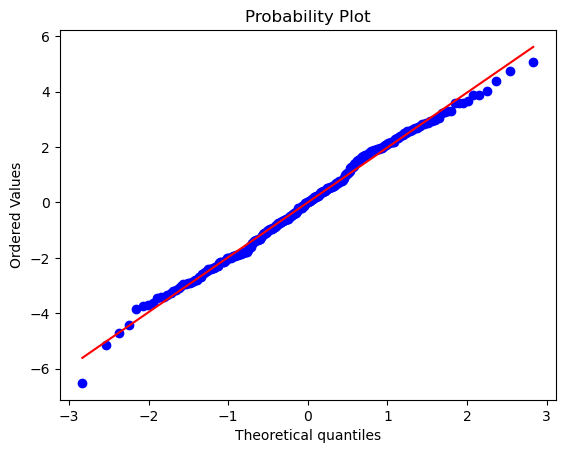

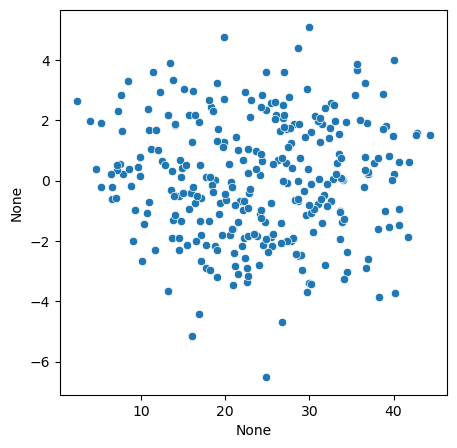

In [19]:
#　Residual plot
plt.figure(figsize=(5, 5))
sns.scatterplot(x=results.fittedvalues, y=df['price']-results.fittedvalues)
plt.show()

# The stratification can also be done as follows.
# Residual plot stratified by structure
# sns.scatterplot(x=results.fittedvalues, y=df['price']-results.fittedvalues, hue=df['structure'])